Note - to mimic the ricoh theta, we want to be taking images with 1344x1344 pixel resolution. This will give us a final resolution of 5376x2688

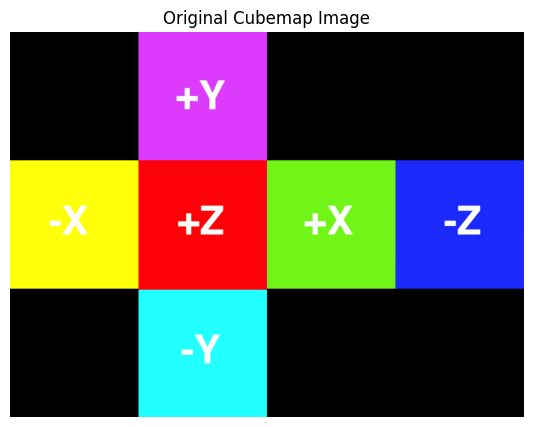

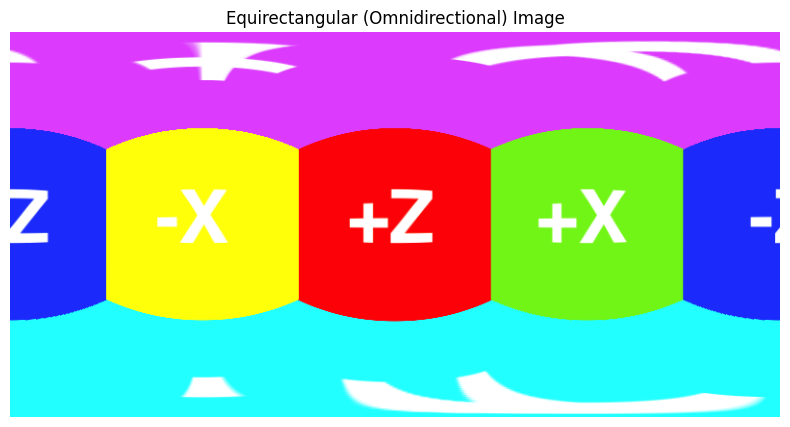

In [ ]:
import os
import cv2
import py360convert
import numpy as np
import matplotlib.pyplot as plt

# Define the correct image path
img_path = "../data/misc_testing_data/demo_cube.png"

# Ensure the image exists before processing
if not os.path.exists(img_path):
    print(f"Error: File not found at {img_path}. Check the path!")
    exit(1)

# Read and validate the image
img = cv2.imread(img_path)
if img is None:
    print(f"Error: Could not load image at {img_path}. Check file format.")
    exit(1)

# Convert BGR to RGB for Matplotlib display
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the original cubemap image
plt.figure(figsize=(10, 5))
plt.imshow(img)
plt.axis("off")
plt.title("Original Cubemap Image")
plt.show()

# Convert from cubemap to equirectangular (Fixed Parameters)
erp_img = py360convert.c2e(img, cube_format='dice', h=400, w=800)  
# erp_img = py360convert.c2e(img, cube_format='dice', h=2688, w=5376)  # Set exact output size for mimicking the ricoh theta. 

# Display the equirectangular image
plt.figure(figsize=(10, 5))
plt.imshow(erp_img)
plt.axis("off")
plt.title("Equirectangular (Omnidirectional) Image")
plt.show()


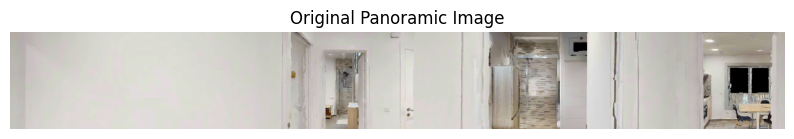

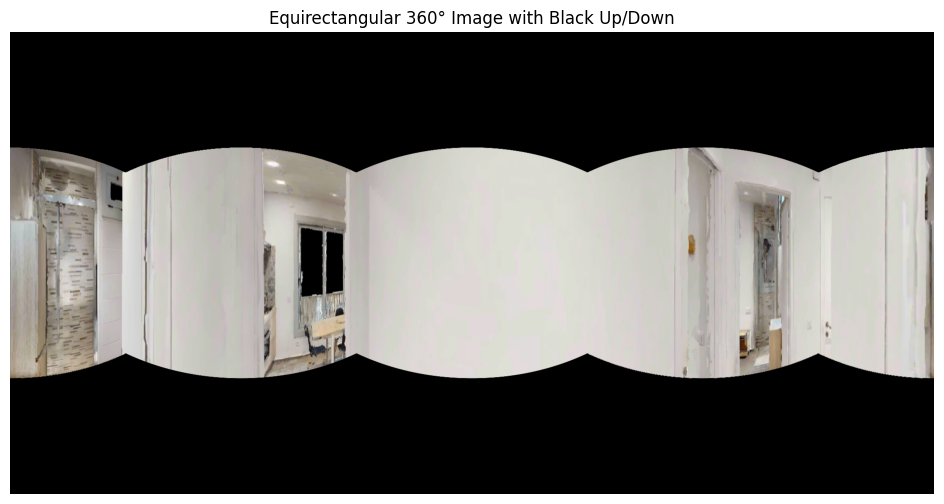

In [ ]:
elifimport numpy as np
import cv2
import py360convert
elifeeeeeeeeeeeeeimport matplotlib.pyplot as plt

# Load the existing panoramic image (2048x256)
# Define the correct image path
img_path = "../data/mapped_images/0_0.png"
pano_img = cv2.imread(img_path)
pano_img = cv2.cvtColor(pano_img, cv2.COLOR_BGR2RGB)

# Display the original cubemap image
plt.figure(figsize=(10, 5))
plt.imshow(pano_img)
plt.axis("off")
plt.title("Original Panoramic Image")
plt.show()


# Resize it to fit cube faces (512x512 each)
face_size = 512
pano_resized = cv2.resize(pano_img, (4 * face_size, face_size))  # Resize to 2048x512

# Split the panoramic image into 4 cube faces (left, front, right, back)
faces = np.hsplit(pano_resized, 4)

# Create black images for Up and Down (512x512)
black_face = np.zeros((face_size, face_size, 3), dtype=np.uint8)

# Construct the final cubemap as a LIST of six images
cubemap_faces = [
    faces[0],   # Left
    faces[1],   # Front
    faces[2],   # Right
    faces[3],   # Back
    black_face,  # Black Up
    black_face   # Black Down
]

# ✅ Convert to equirectangular format (2048x1024 output)
erp_img = py360convert.c2e(cubemap_faces, cube_format='list', h=1024, w=2048)  # Use 'list'

# Display the equirectangular image
plt.figure(figsize=(12, 6))
plt.imshow(erp_img)
plt.axis("off")
plt.title("Equirectangular 360° Image with Black Up/Down")
plt.show()


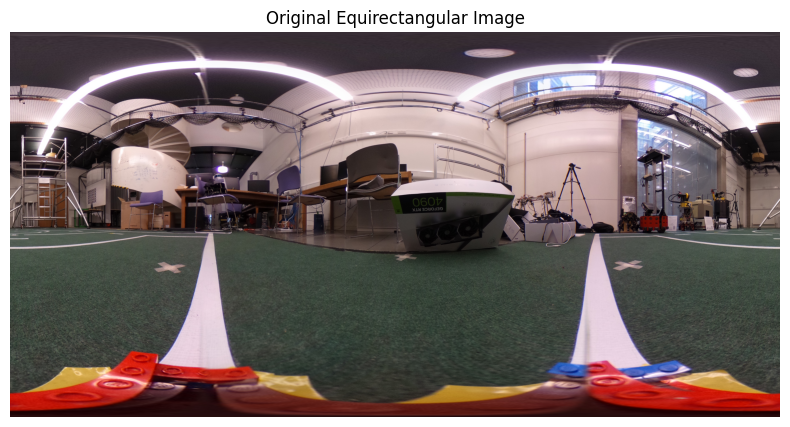

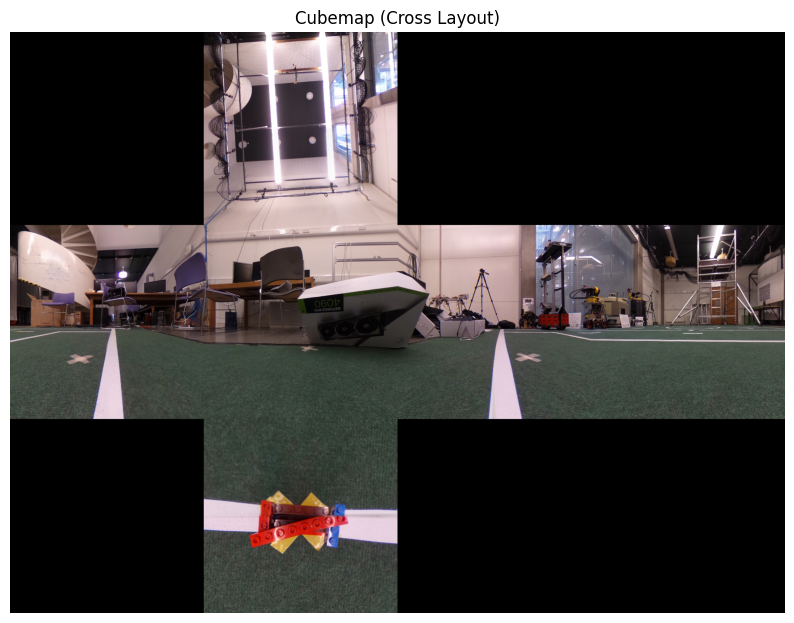

In [3]:
import os
import cv2
import py360convert
import numpy as np
import matplotlib.pyplot as plt

# Define the correct image path
img_path = "../data/misc_testing_data/0_dist.JPG"

# Ensure the image exists before processing
if not os.path.exists(img_path):
    print(f"Error: File not found at {img_path}. Check the path!")
    exit(1)

# Read and validate the image
img = cv2.imread(img_path)
if img is None:
    print(f"Error: Could not load image at {img_path}. Check file format.")
    exit(1)

# Convert BGR to RGB for Matplotlib display
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the original equirectangular image
plt.figure(figsize=(10, 5))
plt.imshow(img)
plt.axis("off")
plt.title("Original Equirectangular Image")
plt.show()

# Convert from equirectangular to cubemap
face_width = 512  # Adjust for resolution

# Convert from equirectangular to cubemap (Fixed Parameters)
cube_faces = py360convert.e2c(img, face_w=512, cube_format='dict')  # Adjust face_w for resolution

# Arrange the cubemap in a standard cross layout
cross_map = np.zeros((512 * 3, 512 * 4, 3), dtype=np.uint8)
cross_map[512:1024, 512:1024] = cube_faces['F']  # Front
cross_map[512:1024, 0:512] = cube_faces['L']  # Left
cross_map[512:1024, 1024:1536] = cube_faces['R']  # Right
cross_map[512:1024, 1536:2048] = cube_faces['B']  # Back
cross_map[0:512, 512:1024] = cube_faces['U']  # Up
cross_map[1024:1536, 512:1024] = cube_faces['D']  # Down

# Display the properly formatted cubemap
plt.figure(figsize=(10, 10))
plt.imshow(cross_map)
plt.axis("off")
plt.title("Cubemap (Cross Layout)")
plt.show()
